In [2]:
#1
import numpy as np

# Example usage
x = np.array([1, -1, 0, 0.5])
y = 1
w = np.array([0.9, 0.1, 0.6, 0.1])
lr=0.1

w_hebbian = w + lr * np.outer(x, y)


w_perceptron = w + lr * x * y


w_delta = w + lr * (y - np.dot(w, x)) * x


w_correlation = w + lr * np.outer(x, y)

w_outstar = w + lr * (y - np.dot(w, x))


print("Hebbian:", w_hebbian)
print("Perceptron:", w_perceptron)
print("Delta:", w_delta)
print("Correlation:", w_correlation)
print("OutStar:", w_outstar)

Hebbian: [[1.   0.2  0.7  0.2 ]
 [0.8  0.   0.5  0.  ]
 [0.9  0.1  0.6  0.1 ]
 [0.95 0.15 0.65 0.15]]
Perceptron: [1.   0.   0.6  0.15]
Delta: [0.915  0.085  0.6    0.1075]
Correlation: [[1.   0.2  0.7  0.2 ]
 [0.8  0.   0.5  0.  ]
 [0.9  0.1  0.6  0.1 ]
 [0.95 0.15 0.65 0.15]]
OutStar: [0.915 0.115 0.615 0.115]


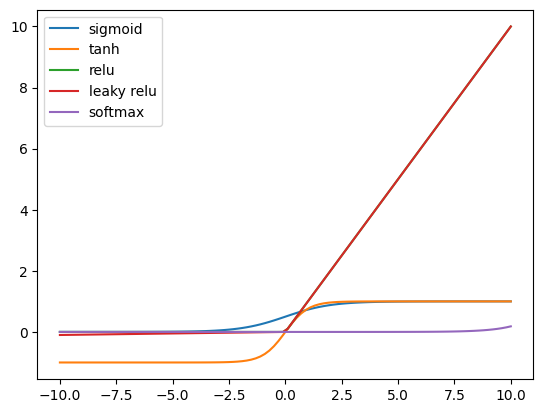

In [3]:
#2
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)
plt.plot(x,1/(1+np.exp(-x)),label='sigmoid')
plt.plot(x,np.tanh(x),label='tanh')
plt.plot(x,np.maximum(0,x),label='relu')
plt.plot(x,np.where(x>0,x,x*0.01),label='leaky relu')
plt.plot(x,np.exp(x)/np.sum(np.exp(x)),label='softmax')
plt.legend()
plt.show()

In [6]:
##3
import numpy as np
def perceptron(inputs,weight,bias):
  #activation=sum(i*w for i, w in zip(inputs,weight))+bias
  activation = np.dot(inputs, weight)
  return 1 if activation>=0 else 0

inputs=[1,1,1]
weight=[0.2,0.4,0.2]
bias=-0.5

ex_output=1
output=perceptron(inputs,weight,bias)
accuracy = 100 if ex_output==output else 0
print("accuracy",accuracy)
print("output",output)

accuracy 100
output 1


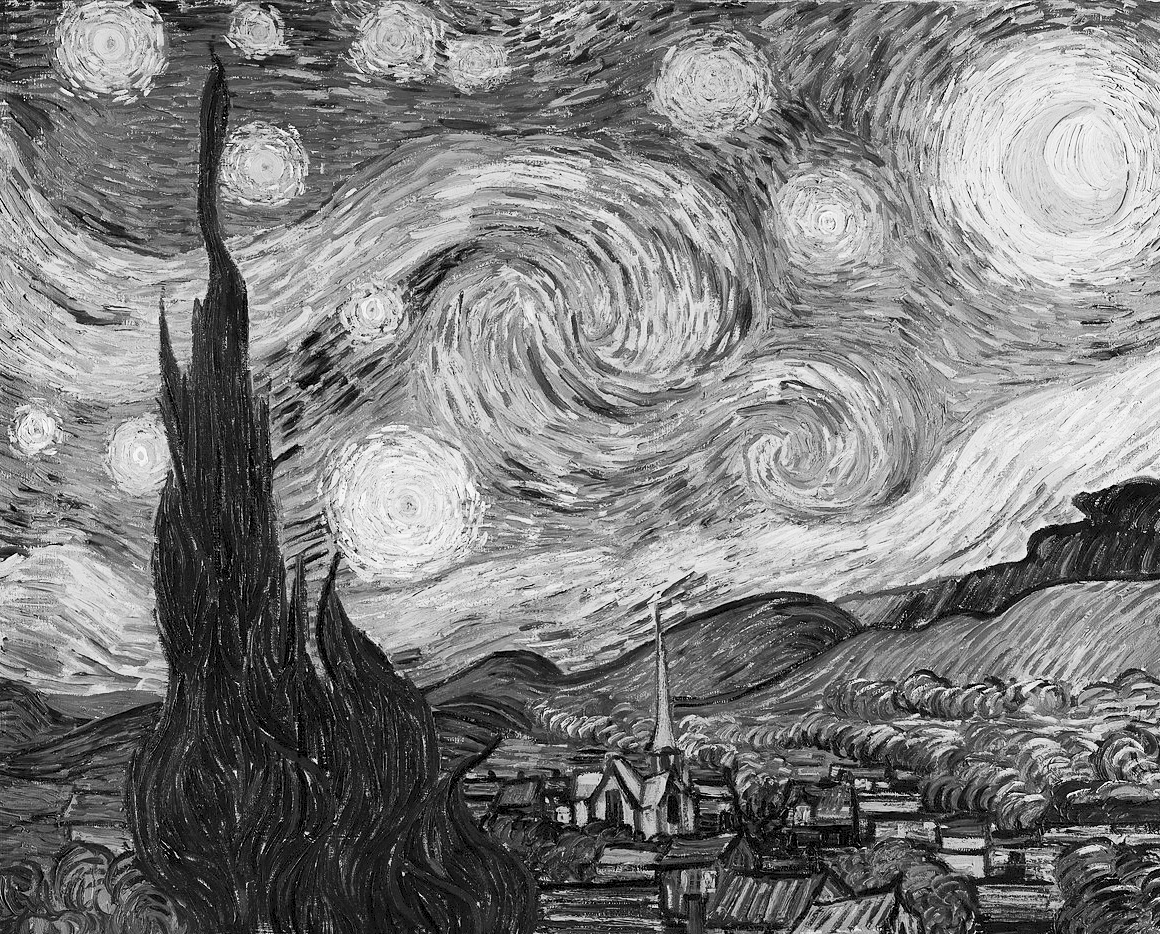

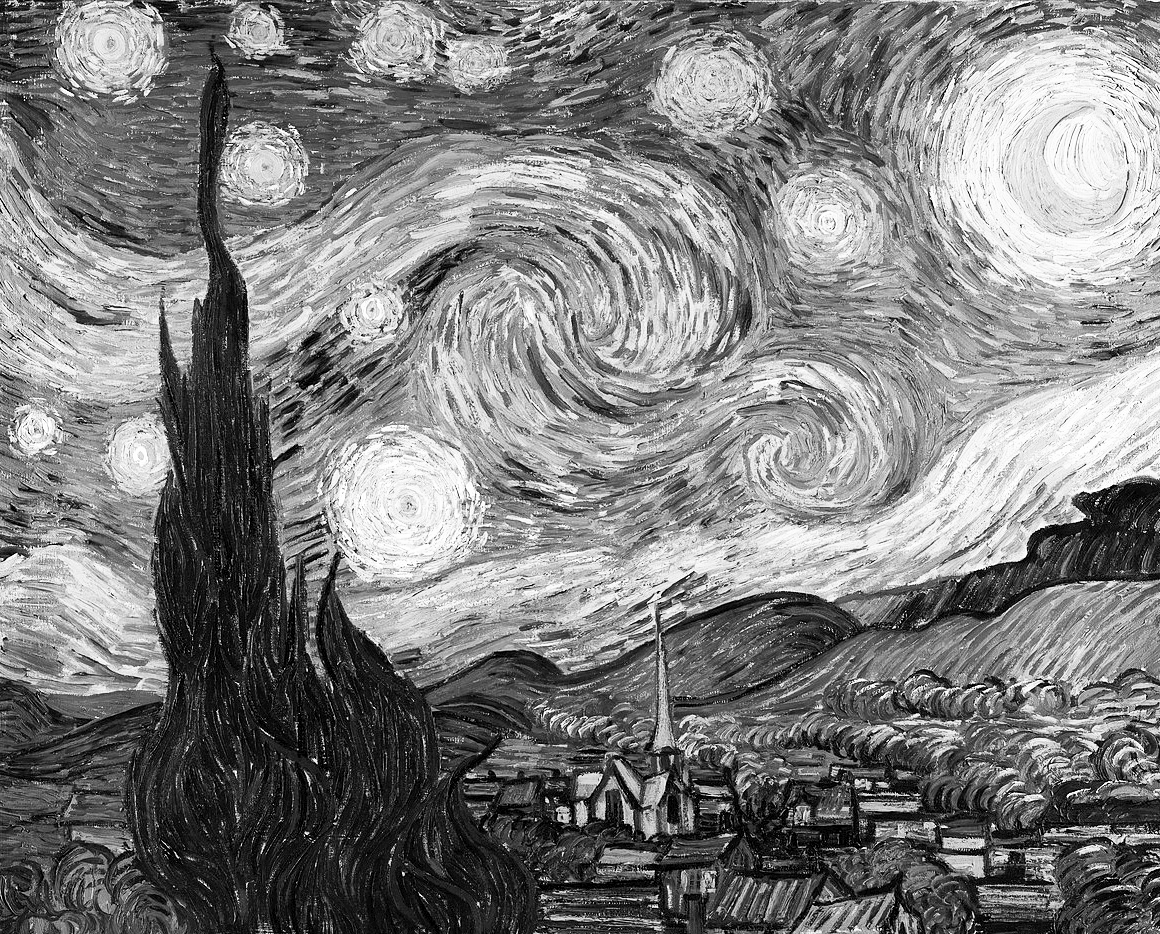

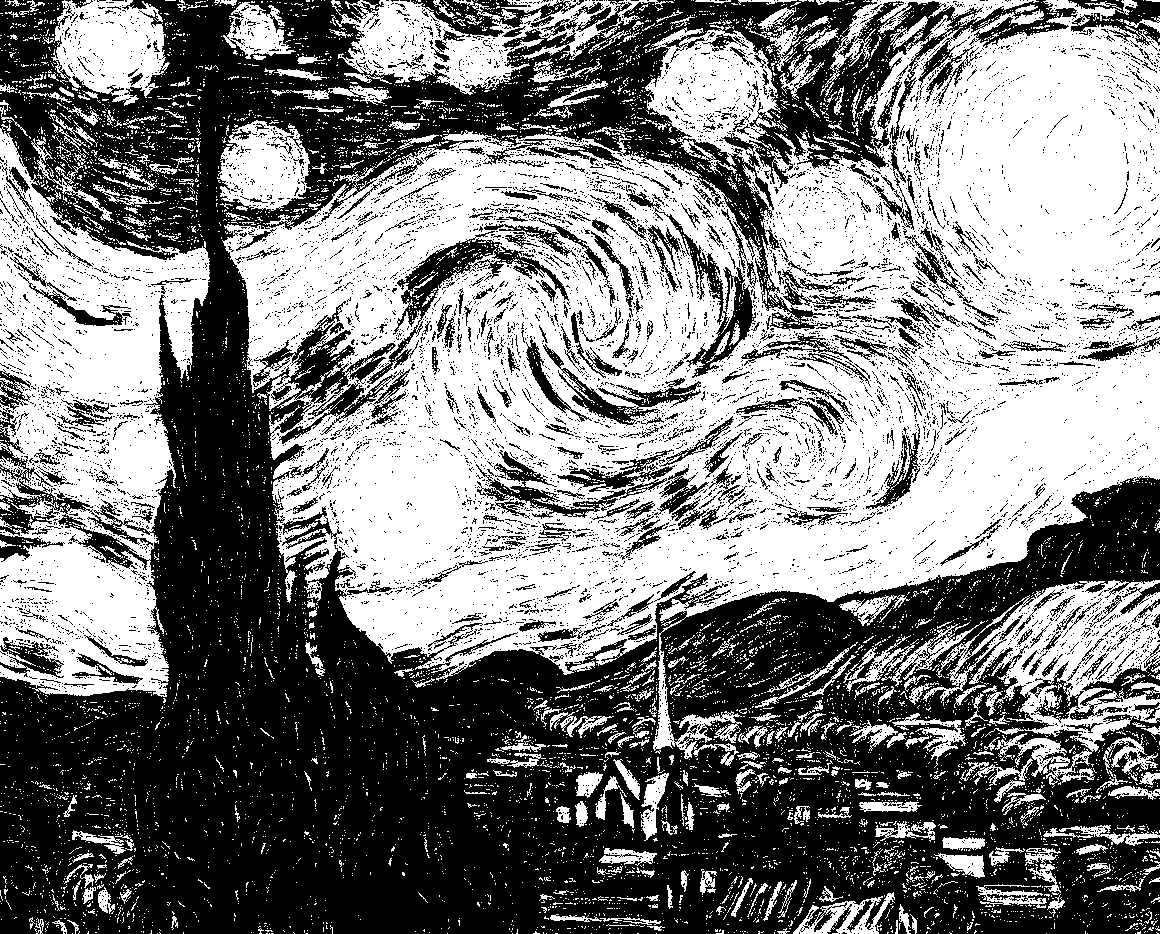

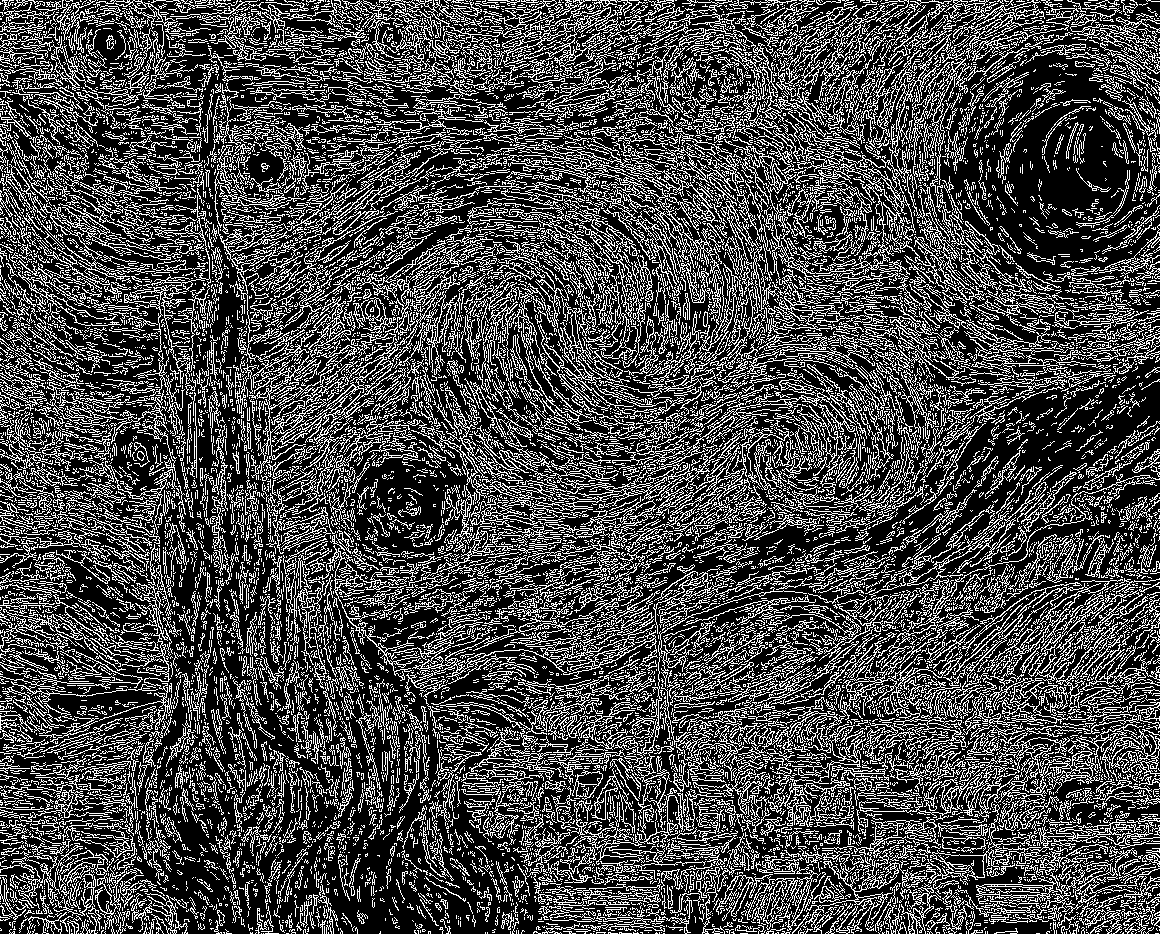

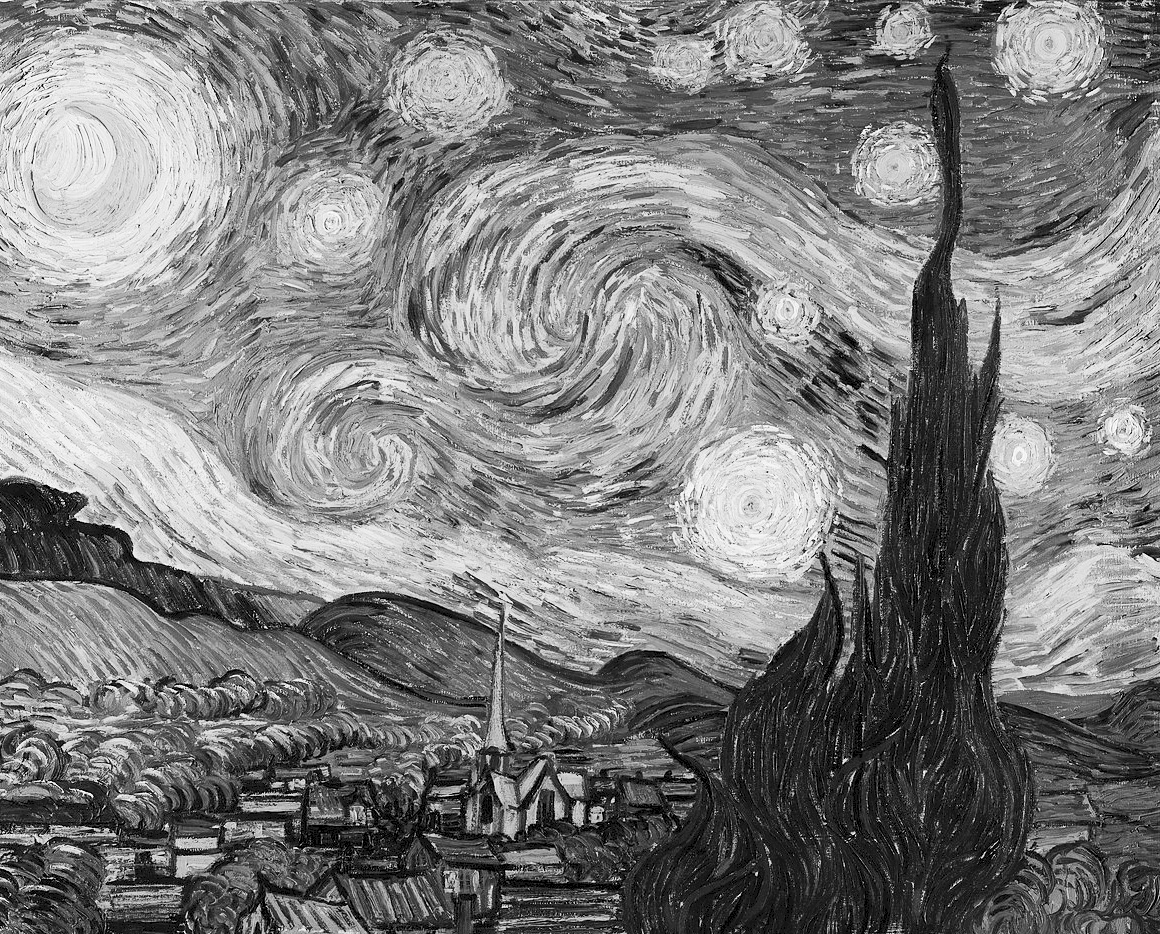

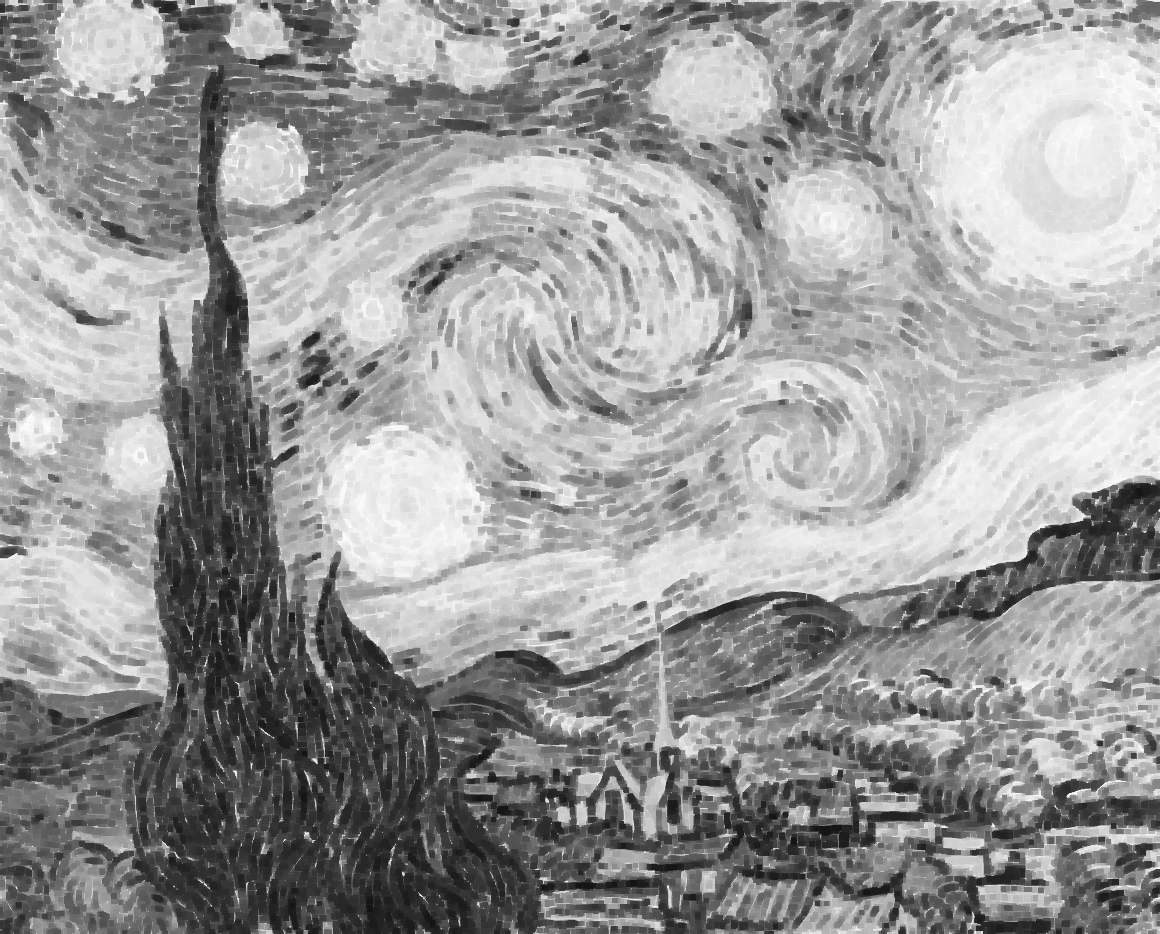

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized = cv2.equalizeHist(img)
    _, thresholded = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(img, 100, 200)
    flipped = cv2.flip(img, 1)
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    cv2_imshow(img)
    cv2_imshow(equalized)
    cv2_imshow(thresholded)
    cv2_imshow(edges)
    cv2_imshow(flipped)
    cv2_imshow( morphed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

process_image('/content/style.png')



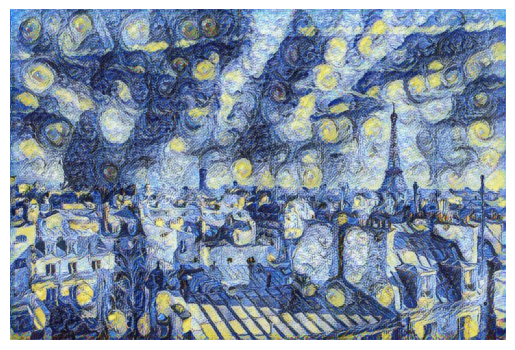

In [8]:
#5
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf

def load_image(path):
  img=cv2.imread(path)
  return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)/255.0

content_image=load_image('/content/image.png')
styled_image=load_image('/content/style.png')

model=hub.load('https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/TensorFlow1/256/2')

stylized_image=model(tf.constant(content_image[tf.newaxis,...],dtype=tf.float32),
                     tf.constant(cv2.resize(styled_image,(256,256))[tf.newaxis,...],dtype=tf.float32))[0]

plt.imshow(stylized_image[0].numpy())
plt.axis('off')
plt.show()

In [9]:
#6
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 class names
cifar_10_classes = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

170498071/170498071 [==============================] - 6s 0us/step


In [10]:
# Build the model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print shapes
print(x_train.shape, y_train.shape)
print(x_test.shape)
model.fit(x_train, y_train, epochs=6, batch_size=32, validation_split=0.2)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3)
Epoch 1/6
1250/1250 [==============================] - 168s 133ms/step - loss: 1.6071 - accuracy: 0.4240 - val_loss: 1.2779 - val_accuracy: 0.5373
Epoch 2/6
1250/1250 [==============================] - 163s 131ms/step - loss: 1.2130 - accuracy: 0.5698 - val_loss: 1.2332 - val_accuracy: 0.5541
Epoch 3/6
1250/1250 [==============================] - 166s 133ms/step - loss: 1.0706 - accuracy: 0.6214 - val_loss: 1.2919 - val_accuracy: 0.5569
Epoch 4/6
1250/1250 [==============================] - 166s 133ms/step - loss: 0.9798 - accuracy: 0.6583 - val_loss: 1.0837 - val_accuracy: 0.6190
Epoch 5/6
1250/1250 [==============================] - 165s 132ms/step - loss: 0.9100 - accuracy: 0.6839 - val_loss: 1.2217 - val_accuracy: 0.5822
Epoch 6/6
1250/1250 [==============================] - 167s 134ms/step - loss: 0.8613 - accuracy: 0.7020 - val_loss: 0.9669 - val_accuracy: 0.6595


In [13]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 11s 35ms/step - loss: 0.9853 - accuracy: 0.6540
[0.9852602481842041, 0.6539999842643738]


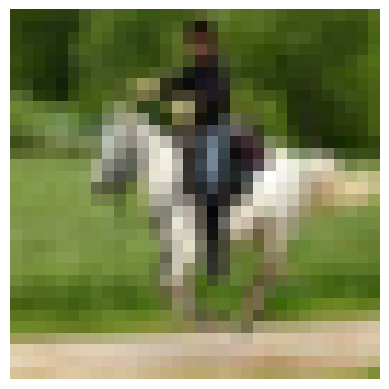

1/1 [==============================] - 0s 29ms/step
Predicted class: Horse


In [12]:
new_image = x_test[782]
plt.imshow(new_image)
plt.axis("off")
plt.show()

img = np.expand_dims(new_image, axis=0)
pred = model.predict(img)
prediction = np.argmax(pred)
print(f"Predicted class: {cifar_10_classes[prediction]}")

In [29]:
#7
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
#X_train,X_test=x_train/255.0,x_test/255.0
model=keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=1)
model.evaluate(x_test,y_test)



313/313 [==============================] - 13s 42ms/step - loss: 0.0814 - accuracy: 0.9758


[0.08142471313476562, 0.9757999777793884]

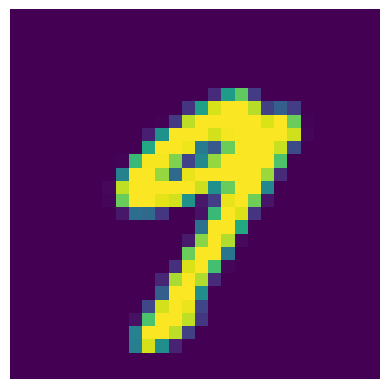

1/1 [==============================] - 0s 29ms/step
prediction: Nine
 actual value: Nine


In [34]:
new_image=x_test[20]
plt.imshow(new_image)

plt.axis('off')
plt.show()
pred=model.predict(np.expand_dims(new_image,axis=0) )
prediction=np.argmax(pred)
class_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
print(f'prediction: {class_names[prediction]}\n actual value: {class_names[y_test[20]]}')

In [19]:
#8
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data=pd.read_csv('sonar.csv',header=None)
X=data.drop(60,axis=1)
y=pd.get_dummies(data[60],drop_first=True)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

model=keras.models.Sequential([
    keras.layers.Dense(60,input_dim=60,activation ='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=8,verbose=0)
model.evaluate=(X_test,y_test)

pred=np.round(model.predict(X_test).reshape(-1))
print("without droupout: ",classification_report(y_test,pred))

model=keras.models.Sequential([
    keras.layers.Dense(60,input_dim=60,activation ='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=8,verbose=0)
model.evaluate=(X_test,y_test)

pred=np.round(model.predict(X_test).reshape(-1))
print("with droupout: ",classification_report(y_test,pred))

2/2 [==============================] - 0s 5ms/step
without droupout:                precision    recall  f1-score   support

       False       0.73      0.89      0.80        27
        True       0.84      0.64      0.73        25

    accuracy                           0.77        52
   macro avg       0.78      0.76      0.76        52
weighted avg       0.78      0.77      0.77        52

2/2 [==============================] - 0s 5ms/step
with droupout:                precision    recall  f1-score   support

       False       0.75      0.78      0.76        27
        True       0.75      0.72      0.73        25

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



In [20]:
#10
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

def load_model(use_batch_norm):
  model=Sequential([
      Flatten(input_shape=(28,28)),
      Dense(64,activation='relu' if not use_batch_norm else None),
      (BatchNormalization() if use_batch_norm else Dropout(0.2)),
      Dense(10,activation='sigmoid')
  ])

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=5,verbose=0)
  return model.evaluate(x_test,y_test,verbose=0)

print("dropout: ",load_model(use_batch_norm=False)[1])
print("Batch normalization: ",load_model(use_batch_norm=True)[1])

dropout:  0.9739000201225281
Batch normalization:  0.9211000204086304


In [21]:
#12
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import numpy as np

# Load IMDB dataset (using top 5000 most frequent words)
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to have the same length
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build GRU model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Function to predict sentiment for a test sentence
def predict_sentiment(sentence):
    word_index = imdb.get_word_index()
    tokens = [word_index.get(word, 0) for word in sentence.lower().split()]
    tokens_padded = sequence.pad_sequences([tokens], maxlen=max_len)
    prediction = model.predict(tokens_padded)[0, 0]
    sentiment = 'positive' if prediction >= 0.5 else 'negative'
    return sentiment

# Test the model on a custom sentence
test_sentence = "The movie was very good and enjoyable"
print(f"Sentence: '{test_sentence}'")
print(f"Predicted Sentiment: {predict_sentiment(test_sentence)}")


782/782 [==============================] - 101s 128ms/step - loss: 0.3387 - accuracy: 0.8536
Test Accuracy: 0.8536400198936462
Sentence: 'The movie was very good and enjoyable'
1/1 [==============================] - 0s 436ms/step
Predicted Sentiment: positive


In [28]:
test_sentence = "worst movie ever"
print(f"Sentence: '{test_sentence}'")
print(f"Predicted Sentiment: {predict_sentiment(test_sentence)}")


Sentence: 'worst movie ever'
1/1 [==============================] - 0s 44ms/step
Predicted Sentiment: positive


In [ ]:
#9
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np

def make_generator():
    return Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, 5, strides=2, padding='same', use_bias=False, activation='tanh')
    ])

def make_discriminator():
    return Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])

generator = make_generator()
discriminator = make_discriminator()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images, batch_size=32):
    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gen_opt.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    disc_opt.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

batch_size = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Training loop
epochs = 50
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, 100])

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, 0] + 1) / 2, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

for epoch in range(epochs):
    for image_batch in train_dataset:
        train_step(image_batch)

    generate_and_save_images(generator, epoch + 1, seed)

generate_and_save_images(generator, epochs, seed)
